## Алгоритмы анализа данных

# Курсовой проект

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import random

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.4)
%matplotlib inline

## Загрузка и обзор данных для обучения

**Описание датасета**

* **age** - возраст репетитора
* **years_of_experience** - опыт работы в годах
* **lesson_price** - цена за урок
* **qualification** - показатель квалификации
* **physics** - преподает ли репетитор также физику (1 - да, 0 - нет)
* **chemistry** - преподает ли репетитор также химию (1 - да, 0 - нет)
* **biology** - преподает ли репетитор также биологию (1 - да, 0 - нет)
* **english** - преподает ли репетитор также английский язык (1 - да, 0 - нет)
* **geography** - преподает ли репетитор также географию (1 - да, 0 - нет)
* **history** - преподает ли репетитор также историю (1 - да, 0 - нет)
* **mean_exam_points** - средний балл на экзамене по математике (целевая переменная).

In [2]:
# Пути к данным
train = './tutors-expected-math-exam-results/train.csv'
test = './tutors-expected-math-exam-results/test.csv'
submission_example = './tutors-expected-math-exam-results/submission_example.csv'

In [3]:
df_train = pd.read_csv(train, index_col='Id')
df_train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [4]:
df_train.shape

(10000, 11)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11)
memory usage: 937.5 KB


In [6]:
df_train.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


### Анализ и описание данных

**Корреляция признакового пространства с целевой переменной**

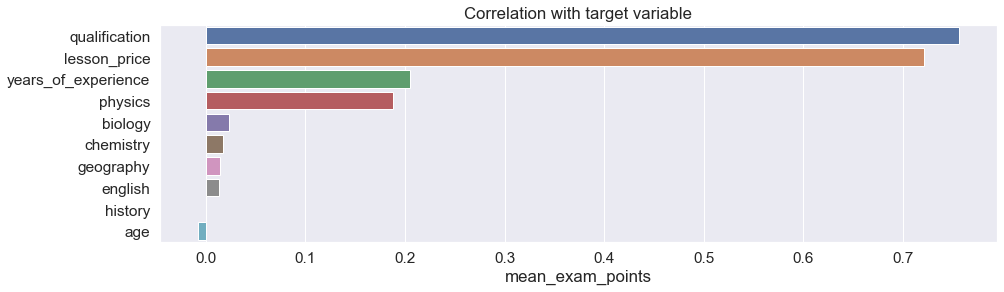

In [7]:
#Кореляция факторов с целевой переменной
cor = df_train.corr().iloc[:-1,-1].sort_values(ascending=False)

plt.figure(figsize=(15, cor.shape[0] * 0.4))
sns.barplot(x=cor, y=cor.index)
plt.title('Correlation with target variable')
plt.show();



**Диаграммы зависимостей признакового пространства от целевой переменной**

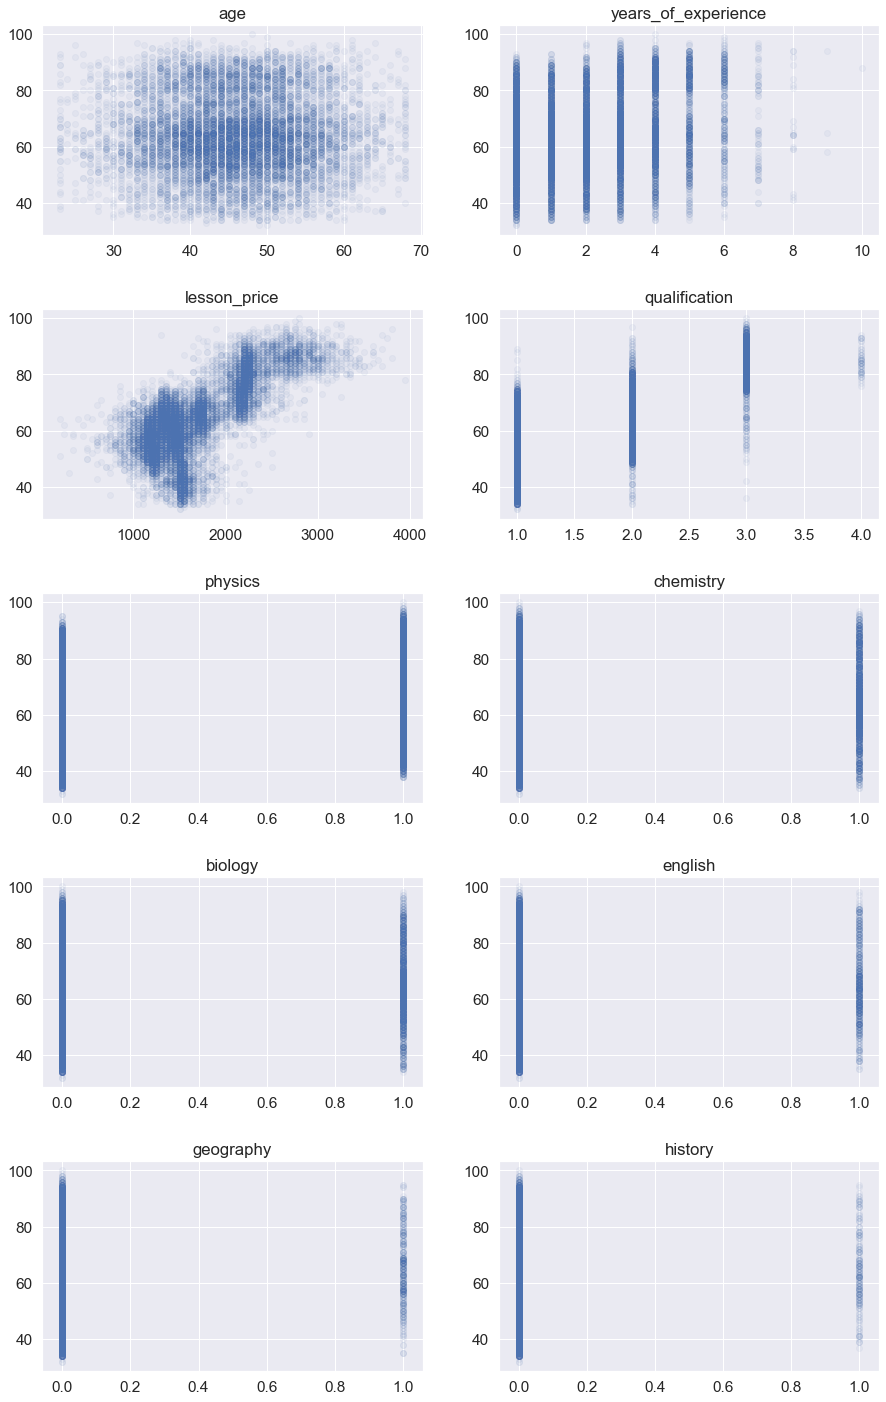

In [8]:
plt.figure(figsize=(15, 30))

for i, feature in enumerate(df_train.columns[:-1]):
    plt.subplot(6, 2, i+1)
    plt.title(feature)
    plt.scatter(df_train[feature], df_train['mean_exam_points'], alpha=0.05)

plt.subplots_adjust(hspace=0.35)
plt.show()

**Выводы**
 - Возрост и квалификация по истории не оказывают значимого положительного влияния на целевую переменную
 - Уровень образования и стоимость обучения являются наиболее значинами признаками
 - Количество лет практики и квалификация по физики оказывают среднее влияние на целевую переменную
 - Квалификация по биологии химии географии и английскому оказывают наименьшее значимое положительное влияние на целевую переменную
 - Возрост имеет нормальное распределение

### Обработка данных

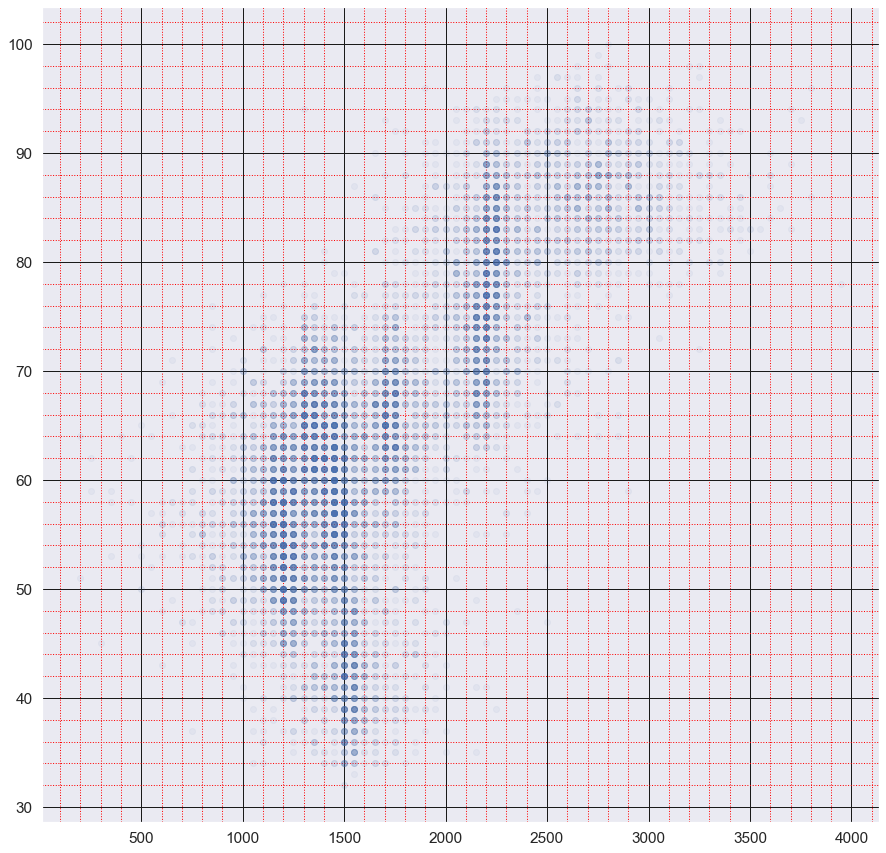

In [9]:
plt.figure(figsize=(15, 15))
plt.grid(which='major', color = 'k')
plt.minorticks_on()
plt.grid(which='minor',
        color = 'red',
        linestyle = ':')
plt.scatter(df_train['lesson_price'], df_train['mean_exam_points'], alpha=0.05)

In [10]:
def data_processing (df):
    """Фунция обработки данный датасета"""
    
    # делим стоимость занаятий 5 категорий
    conditions = [
    (df['lesson_price'] < 1300),    
    (df['lesson_price'] >= 1300) & (df['lesson_price'] < 1600),
    (df['lesson_price'] >= 1600) & (df['lesson_price'] < 1950),
    (df['lesson_price'] >= 1950) & (df['lesson_price'] < 2500),
    (df['lesson_price'] >= 2500)]
    choices = [0, 1, 2, 3, 4]
    
    df['price_category'] = np.select(conditions, choices, default = 5)
    
    #если цена урока больше 2000
    df['>2000'] = (df['lesson_price'] > 2000 ).astype(int)
    
    #Цена единицы квалификации
    df['test'] = df['lesson_price'] / (df['qualification'] *(df['years_of_experience']+1))
    
        
    #Количиство преподоваемых предметов за исключением истории и физики
    df['count_sciences'] = df['chemistry'] + df['biology'] + df['english'] + df['geography'] 
    
    return df

In [11]:
df_train = data_processing(df_train)
df_train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,price_category,>2000,test,count_sciences
Id,,,,,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0,1,0,1400.000000,1.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0,4,1,190.000000,0.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,0,1200.000000,0.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1,0,233.333333,0.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1,0,750.000000,0.0


### Разбиение на train и valid

In [12]:
X = df_train.drop(columns=['mean_exam_points', 'age', 'history']).values
y = df_train['mean_exam_points'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.35, random_state=21)

## Функции для реализации и проверки модели

**Коэффициент детерминации**

In [13]:
def r_2(labels, answers):
    return (1 - np.sum((answers - labels) ** 2) / np.sum((labels - np.mean(labels))**2))

**Решающее дерево**

In [14]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [15]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        preds = []
        for label in self.labels:
            preds.append(label)
        preds = np.array(preds)    
        prediction = np.mean(preds)
        return prediction    

In [16]:
# Расчет дисперсии

def variance(target):
    if len(target) <= 30:
        return np.var(target, ddof=1)
    return np.var(target)

In [17]:
# Разбиение датасета в узле

def split(data, target, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_target = target[left]
    false_target = target[right]
        
    return true_data, false_data, true_target, false_target

In [18]:
def dispersion_(labels):
    objects = []
        
    for label in labels:
        objects.append(label)
        
    objects = np.array(objects)    
    pred = objects.mean()
    return np.mean((labels - pred) ** 2)

In [19]:
def quality(left_labels, right_labels, current_dispersion_):

    # доля выбоки, ушедшей в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_dispersion_ - p * dispersion_(left_labels) - (1 - p) * dispersion_(right_labels)

In [20]:
# Нахождение наилучшего разбиения

def find_best_split(data, target):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5
    
    current_variance = variance(target)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_target, false_target = split(data, target, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = current_variance - variance(true_target)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [21]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, target, max_depth=None, n_splits=0):

    quality, t, index = find_best_split(data, target)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, target)
   
    #  Ограничение на глубину
    if max_depth:
        if n_splits == max_depth:
            return Leaf(data, target)
        n_splits += 1        
            
    true_data, false_data, true_target, false_target = split(data, target, index, t)

    # Рекурсивно строим два поддерева,
    # передавая обновляемые параметры
    true_branch = build_tree(true_data, true_target, max_depth, n_splits)
    false_branch = build_tree(false_data, false_target, max_depth, n_splits)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [22]:
def predict_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return predict_object(obj, node.true_branch)
    else:
        return predict_object(obj, node.false_branch)

In [23]:
def predict(data, tree):
    
    predictions = []
    for obj in data:
        prediction = predict_object(obj, tree)
        predictions.append(prediction)
    return predictions

**Случайный лес**

In [24]:
def get_bootstrap(data, labels, N):
    random.seed(5)
    n_samples = int(data.shape[0] * 0.9)
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [25]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(len_sample / 3)
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [26]:
def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 3

    current_dispersion_ = dispersion_(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    subsample = get_subsample(n_features)
    
    for index in subsample:
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее min_leaf объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_dispersion_)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [27]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        obj = np.array(obj)
        voted_predictions.append(np.mean(obj))
        
    return voted_predictions

In [28]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

## Обучение и проверка модели

In [29]:
%%time
n_trees = 20
my_forest = random_forest(X_train, y_train, n_trees)

Wall time: 27min 28s


In [30]:
%%time
train_answers = tree_vote(my_forest, X_train)
test_answers = tree_vote(my_forest, X_valid)

Wall time: 839 ms


In [31]:
train_r_2 = r_2(y_train, train_answers)
test_r_2 = r_2(y_valid, test_answers)
print (f'На обучающей выборке: {train_r_2}\nНа тестовой выборке: {test_r_2}')

На обучающей выборке: 0.825291454083971
На тестовой выборке: 0.7746391431413504


## Предсказание

In [32]:
df_test = pd.read_csv(test, index_col='Id')
data_processing(df_test).values
X_test = df_test.drop(columns=['age', 'history']).values

In [33]:
test_pred = tree_vote(my_forest, X_test)

In [34]:
submission = pd.read_csv(submission_example, index_col='Id')
submission.iloc[:, 0] = test_pred

submission.to_csv('RumyantsevK_submission.csv')

In [35]:
df  = pd.read_csv('RumyantsevK_submission.csv')
df.head()

,Id,mean_exam_points
0,10000,54.150219
1,10001,64.347778
2,10002,47.422916
3,10003,90.680536
4,10004,89.098357
